In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv('US_Accidents_Dec20_updated.csv')
data.info()

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083554 entries, 0 to 1083553
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1083554 non-null  object 
 1   Severity               1083554 non-null  int64  
 2   Start_Time             1083554 non-null  object 
 3   End_Time               1083553 non-null  object 
 4   Start_Lat              1083553 non-null  float64
 5   Start_Lng              1083553 non-null  float64
 6   End_Lat                1083553 non-null  float64
 7   End_Lng                1083553 non-null  float64
 8   Distance(mi)           1083553 non-null  float64
 9   Description            1083553 non-null  object 
 10  Number                 369021 non-null   float64
 11  Street                 1083553 non-null  object 
 12  Side                   1083553 non-null  object 
 13  City                   1083484 non-null  object 
 14  County            

In [11]:
features = ['Start_Time', 'Start_Lat', 'Start_Lng', 'Zipcode', 'Temperature(F)', 'Humidity(%)',\
            'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition']
selected_data = data[features]
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083554 entries, 0 to 1083553
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Start_Time         1083554 non-null  object 
 1   Start_Lat          1083553 non-null  float64
 2   Start_Lng          1083553 non-null  float64
 3   Zipcode            1083040 non-null  object 
 4   Temperature(F)     1051684 non-null  float64
 5   Humidity(%)        1049638 non-null  float64
 6   Visibility(mi)     1051710 non-null  float64
 7   Wind_Speed(mph)    1014435 non-null  float64
 8   Weather_Condition  1052302 non-null  object 
dtypes: float64(6), object(3)
memory usage: 74.4+ MB


array([[<AxesSubplot:title={'center':'Start_Lat'}>,
        <AxesSubplot:title={'center':'Start_Lng'}>],
       [<AxesSubplot:title={'center':'Temperature(F)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>],
       [<AxesSubplot:title={'center':'Visibility(mi)'}>,
        <AxesSubplot:title={'center':'Wind_Speed(mph)'}>]], dtype=object)

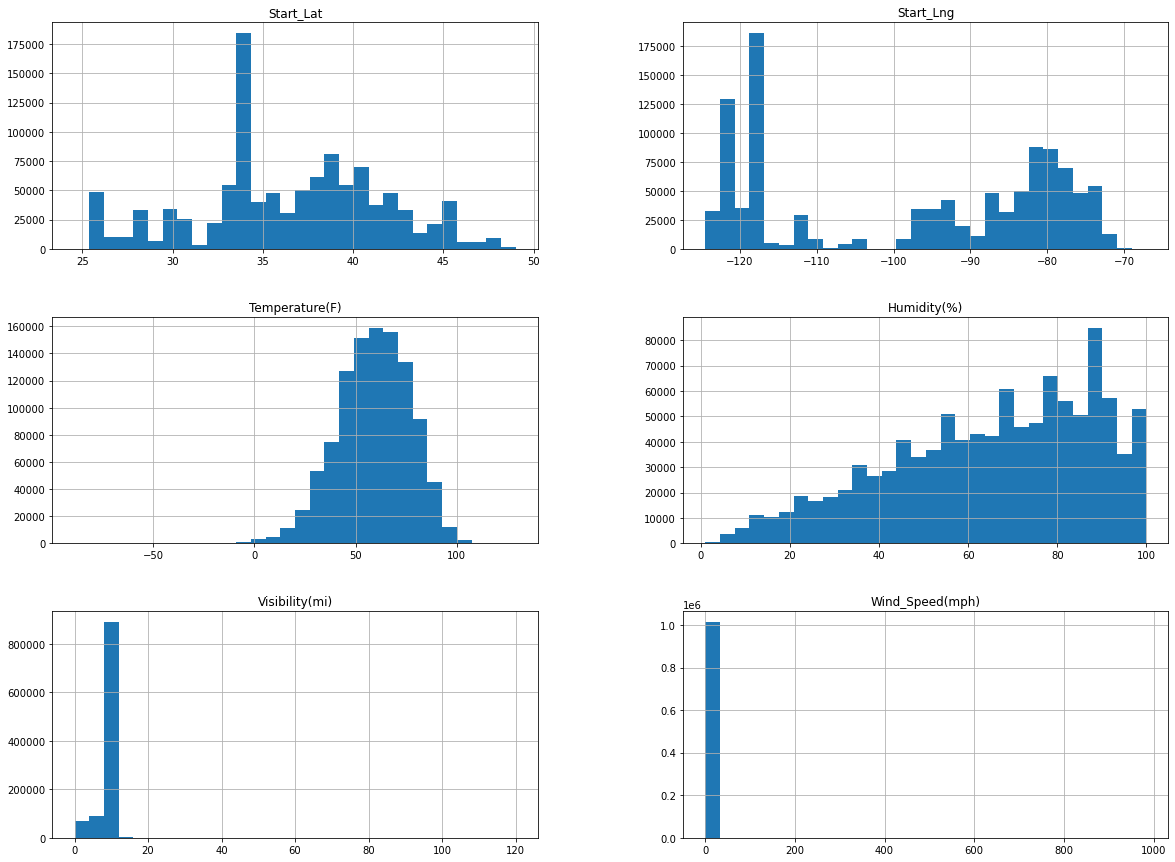

In [12]:
selected_data.hist(bins=30,figsize=(20,15))

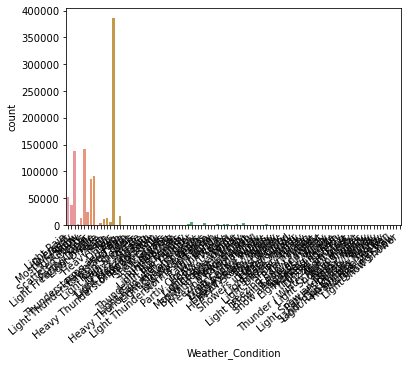

In [13]:
import seaborn as sns

wplot = sns.countplot(data=selected_data,x='Weather_Condition')
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [14]:
# Date Parsing
import datetime

# day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
selected_data['Year'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[0].split('-')[0]), axis = 1)
selected_data['Month'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[0].split('-')[1]), axis = 1)
selected_data['Day'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[0].split('-')[2]), axis = 1)
selected_data['Hour'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[1].split(':')[0]), axis = 1)
selected_data['Weekday'] = selected_data.apply(lambda row: datetime.date(row.Year, row.Month, row.Day).weekday(), axis = 1)
selected_data['Day_of_Year'] = selected_data.apply(lambda row: datetime.date(row.Year, row.Month, row.Day).timetuple().tm_yday, axis=1)

<ipython-input-14-51775e7e591d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Year'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[0].split('-')[0]), axis = 1)
<ipython-input-14-51775e7e591d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Month'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[0].split('-')[1]), axis = 1)
<ipython-input-14-51775e7e591d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [15]:
selected_data.head()

,Start_Time,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Year,Month,Day,Hour,Weekday,Day_of_Year
0,2016-02-08 00:37:08,40.10891,-83.09286,43017,42.1,58.0,10.0,10.4,Light Rain,2016,2,8,0,0,39
1,2016-02-08 05:56:20,39.86542,-84.06280,45424,36.9,91.0,10.0,NaN,Light Rain,2016,2,8,5,0,39
2,2016-02-08 06:15:39,39.10266,-84.52468,45203,36.0,97.0,10.0,NaN,Overcast,2016,2,8,6,0,39
3,2016-02-08 06:15:39,39.10148,-84.52341,45202,36.0,97.0,10.0,NaN,Overcast,2016,2,8,6,0,39
4,2016-02-08 06:51:45,41.06213,-81.53784,44311,39.0,55.0,10.0,NaN,Overcast,2016,2,8,6,0,39


In [16]:
# zipcode extra digits removal
#selected_data['Zipcode'] = selected_data.apply(lambda row: row.Zipcode.split('-')[0], axis=1)

# temperature null checking
print("# of NaN in Temperature")
print(selected_data['Temperature(F)'].isna().sum())

# fill the temperature with the month's average
temp_monthly_avg = selected_data.groupby(['Month']).mean()['Temperature(F)']
selected_data['Temperature(F)'] = selected_data.apply(lambda row: \
                                                      temp_monthly_avg.iloc[row.Month-1] \
                                                      if np.isnan(row['Temperature(F)']) \
                                                      else row['Temperature(F)'], axis=1)

print(selected_data['Temperature(F)'].isna().sum())

# humidity null checking
print("# of NaN in Humidity")
print(selected_data['Humidity(%)'].isna().sum())

# fill the temperature with the month's average
temp_monthly_avg = selected_data.groupby(['Month']).mean()['Humidity(%)']
selected_data['Humidity(%)'] = selected_data.apply(lambda row: \
                                                      temp_monthly_avg.iloc[row.Month-1] \
                                                      if np.isnan(row['Humidity(%)']) \
                                                      else row['Humidity(%)'], axis=1)

print(selected_data['Humidity(%)'].isna().sum())

# visibility null checking
print("# of NaN in Visibility")
print(selected_data['Visibility(mi)'].isna().sum())

# fill the temperature with the month's average
selected_data['Visibility(mi)'] = selected_data.apply(lambda row: \
                                                      selected_data['Visibility(mi)'].mean() \
                                                      if np.isnan(row['Visibility(mi)']) \
                                                      else row['Visibility(mi)'], axis=1)

print(selected_data['Visibility(mi)'].isna().sum())

# visibility null checking
print("# of NaN in Wind Speed")
print(selected_data['Wind_Speed(mph)'].isna().sum())

# fill the temperature with the month's average
selected_data['Wind_Speed(mph)'] = selected_data.apply(lambda row: \
                                                      round(selected_data['Wind_Speed(mph)'].mean(),1) \
                                                      if np.isnan(row['Wind_Speed(mph)']) \
                                                      else row['Wind_Speed(mph)'], axis=1)

print(selected_data['Wind_Speed(mph)'].isna().sum())

# weather condition null checking
print("# of NaN in Weather Condition")
print(selected_data['Weather_Condition'].isna().sum())

selected_data = selected_data.dropna(subset=['Weather_Condition'])

print(selected_data['Weather_Condition'].isna().sum())

# of NaN in Temperature
31870


<ipython-input-16-73f6c6ea5ff4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Temperature(F)'] = selected_data.apply(lambda row: \


0
# of NaN in Humidity
33916


<ipython-input-16-73f6c6ea5ff4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Humidity(%)'] = selected_data.apply(lambda row: \


0
# of NaN in Visibility
31844


<ipython-input-16-73f6c6ea5ff4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Visibility(mi)'] = selected_data.apply(lambda row: \


0
# of NaN in Wind Speed
69119


<ipython-input-16-73f6c6ea5ff4>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Wind_Speed(mph)'] = selected_data.apply(lambda row: \


0
# of NaN in Weather Condition
31252
0


In [17]:

selected_data.isna().sum()

Start_Time           0
Start_Lat            0
Start_Lng            0
Zipcode              0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Wind_Speed(mph)      0
Weather_Condition    0
Year                 0
Month                0
Day                  0
Hour                 0
Weekday              0
Day_of_Year          0
dtype: int64

In [18]:
selected_data.shape

(1052302, 15)

In [19]:

def latitude_to_meters(lat):
    return lat*69.2*1.6*1000

def longitude_to_meters(lng):
    return lng*55.051*1.6*1000

In [20]:

lat_height = latitude_to_meters(data['Start_Lat'].max() - data['Start_Lat'].min())
lng_width = longitude_to_meters(data['Start_Lng'].max() - data['Start_Lng'].min())

print(round(lat_height,2), round(lng_width,2), "meters")

2704889.16 5054501.22 meters


In [21]:
location = ['Start_Lat', 'Start_Lng']
loc_data = selected_data[location]

In [22]:
latitude_to_meters(0.001)

110.72

In [23]:

from sklearn.cluster import DBSCAN
import numpy as np

# 0.001 degree in latitude means ~100 meters
# cluster requires at least 20 accidents
db = DBSCAN(eps=0.001, min_samples=20).fit(loc_data)

labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise_ = list(labels).count(-1)
print('Estimated number of noise points: %d' % n_noise_)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

Estimated number of clusters: 8502
Estimated number of noise points: 683457


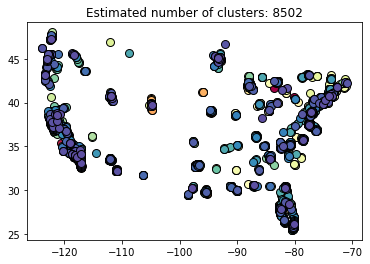

In [24]:
cluster_loc = []
cluster_mean = {}

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k != -1:
        class_member_mask = (labels == k)

        xy = loc_data[class_member_mask & core_samples_mask]
        plt.plot(xy.iloc[:, 1].mean(), xy.iloc[:, 0].mean(), 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=8)
        cluster_loc.append((xy.iloc[:, 1].mean(), xy.iloc[:, 0].mean(), xy.shape[0]))
        cluster_mean[k] = [xy.iloc[:, 1].mean(), xy.iloc[:, 0].mean()]

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [25]:
cluster_mean

{0: [-81.75959043478261, 41.46740608695651],
 1: [-84.20561, 39.750400000000006],
 2: [-82.99709107142857, 40.04304607142857],
 3: [-81.7214408695652, 41.4748139130435],
 4: [-84.21479407142859, 39.747408178571405],
 5: [-84.49075950000007, 39.17368300000002],
 6: [-80.0989848780488, 40.588786268292694],
 7: [-81.50513014285718, 41.06186935714282],
 8: [-84.4872042857143, 39.17753999999999],
 9: [-84.204791875, 39.742129968750014],
 10: [-83.54205238095236, 41.6329148095238],
 11: [-81.70001929629626, 41.47398581481483],
 12: [-84.52271940540537, 39.08869278378377],
 13: [-82.89516104999998, 39.905445900000004],
 14: [-80.02818177777776, 40.444313722222226],
 15: [-84.51429071428572, 39.16166732142857],
 16: [-84.51923220000003, 39.0717964857143],
 17: [-84.53914745098044, 39.14751411764705],
 18: [-84.49458090909087, 39.13236636363635],
 19: [-84.516019, 39.097654],
 20: [-84.54284450000002, 39.056534999999975],
 21: [-81.51599125000004, 41.365290416666674],
 22: [-84.18457, 39.78517]

In [26]:
selected_data['Cluster'] = db.labels_.tolist()

In [28]:
# drop the noise cluster
selected_data.drop(selected_data[selected_data['Cluster'] == -1].index , inplace=True)

In [29]:
cluster_data = pd.DataFrame(cluster_loc, columns = ['Start_Lng' , 'Start_Lat', 'Num'])

In [32]:
import gmaps
import gmaps.datasets

# api_key uniquely belongs to Sean
api_key_loc = './../api/googlemap_api.txt'

f = open(api_key_loc, "r")
key = f.readline()
f.close()

gmaps.configure(api_key=key) # Your Google API key
# load a Numpy array of (latitude, longitude) pairs
s_data = selected_data[selected_data['Hour'] == 23]
locations = s_data[['Start_Lat','Start_Lng']] #gmaps.datasets.load_dataset("taxi_rides")

center_lat = 37.330092
center_lng = -121.871385

fig = gmaps.figure(map_type='SATELLITE', center=(center_lat, center_lng), zoom_level=11)
#fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations))
fig

FileNotFoundError: [Errno 2] No such file or directory: './../api/googlemap_api.txt'

In [31]:
pip install gmaps

  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076097 sha256=ea7819875bd2bef80c9f914a901609ee57d8579da6bcefb87d48ca1b0b0c4596
  Stored in directory: c:\users\ishan\appdata\local\pip\cache\wheels\30\bd\87\d0d731ee712c34a4d6bace8b1dbf8c8932e22a1625b4a55be4
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.


In [33]:
clustered_loc = cluster_data

fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(
    clustered_loc[['Start_Lat', 'Start_Lng']], weights=clustered_loc['Num'],
    max_intensity=100, point_radius=7.0
)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
clustered_loc

,Start_Lng,Start_Lat,Num
0,-81.759590,41.467406,23
1,-84.205610,39.750400,6
2,-82.997091,40.043046,28
3,-81.721441,41.474814,23
4,-84.214794,39.747408,28
...,...,...,...
8497,-93.089120,44.985460,1
8498,-93.402280,45.091940,1
8499,-80.157840,26.166180,1
8500,-104.829370,39.670090,1


In [35]:
selected_data

,Start_Time,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Year,Month,Day,Hour,Weekday,Day_of_Year,Cluster
3,2016-02-08 06:15:39,39.101480,-84.523410,45202,36.0,97.0,10.0,7.4,Overcast,2016,2,8,6,0,39,8342
51,2016-02-10 08:19:15,41.467470,-81.759090,44111,19.9,78.0,8.0,16.1,Light Snow,2016,2,10,8,2,41,0
55,2016-02-10 08:39:16,39.750400,-84.205610,45402,15.3,81.0,2.0,10.4,Light Snow,2016,2,10,8,2,41,1
57,2016-02-10 09:06:09,40.043760,-82.997080,43224,15.8,79.0,1.0,10.4,Light Snow,2016,2,10,9,2,41,2
80,2016-02-10 21:05:16,41.474870,-81.720950,44102,21.9,68.0,1.8,26.5,Light Snow,2016,2,10,21,2,41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083546,2019-10-16 17:11:00,33.921009,-118.082819,90650,80.0,36.0,10.0,5.0,Fair,2019,10,16,17,2,289,1431
1083547,2019-10-16 17:13:00,34.085287,-117.301196,92410,88.0,16.0,7.0,14.0,Mostly Cloudy,2019,10,16,17,2,289,933
1083548,2019-10-16 17:15:00,34.036600,-118.317610,90018,79.0,35.0,10.0,0.0,Fair,2019,10,16,17,2,289,1036
1083550,2019-10-16 17:16:00,34.072742,-118.053626,91731-2220,80.0,36.0,10.0,5.0,Fair,2019,10,16,17,2,289,965


In [36]:
cluster_mean[0]

[-81.75959043478261, 41.46740608695651]

In [37]:
# store cluster_lat, cluster_lng from cluster_mean
selected_data['Cluster_Lat'] = selected_data.apply(lambda row:\
                                                   cluster_mean[row.Cluster][1], axis=1)
selected_data['Cluster_Lng'] = selected_data.apply(lambda row:\
                                                   cluster_mean[row.Cluster][0], axis=1)

In [38]:
selected_data

,Start_Time,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Year,Month,Day,Hour,Weekday,Day_of_Year,Cluster,Cluster_Lat,Cluster_Lng
3,2016-02-08 06:15:39,39.101480,-84.523410,45202,36.0,97.0,10.0,7.4,Overcast,2016,2,8,6,0,39,8342,39.101590,-84.522820
51,2016-02-10 08:19:15,41.467470,-81.759090,44111,19.9,78.0,8.0,16.1,Light Snow,2016,2,10,8,2,41,0,41.467406,-81.759590
55,2016-02-10 08:39:16,39.750400,-84.205610,45402,15.3,81.0,2.0,10.4,Light Snow,2016,2,10,8,2,41,1,39.750400,-84.205610
57,2016-02-10 09:06:09,40.043760,-82.997080,43224,15.8,79.0,1.0,10.4,Light Snow,2016,2,10,9,2,41,2,40.043046,-82.997091
80,2016-02-10 21:05:16,41.474870,-81.720950,44102,21.9,68.0,1.8,26.5,Light Snow,2016,2,10,21,2,41,3,41.474814,-81.721441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083546,2019-10-16 17:11:00,33.921009,-118.082819,90650,80.0,36.0,10.0,5.0,Fair,2019,10,16,17,2,289,1431,33.920109,-118.082218
1083547,2019-10-16 17:13:00,34.085287,-117.301196,92410,88.0,16.0,7.0,14.0,Mostly Cloudy,2019,10,16,17,2,289,933,34.084575,-117.300632
1083548,2019-10-16 17:15:00,34.036600,-118.317610,90018,79.0,35.0,10.0,0.0,Fair,2019,10,16,17,2,289,1036,34.036746,-118.317413
1083550,2019-10-16 17:16:00,34.072742,-118.053626,91731-2220,80.0,36.0,10.0,5.0,Fair,2019,10,16,17,2,289,965,34.072502,-118.055851


In [39]:
selected_data.to_csv ('PositiveTrainingData.csv', index = None, header=True)